In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
import statsmodels.api as sm
import pickle

In [4]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df.drop(['Index'],axis=1,inplace=True)

In [5]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [9]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

Text(0, 0.5, 'Weight')

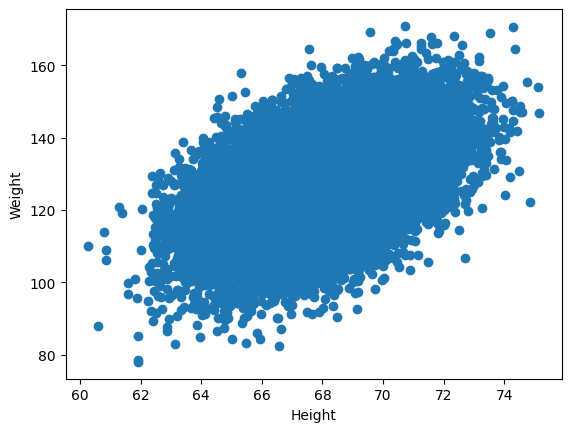

In [10]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [11]:
X = df[['Height(Inches)']]
y = df['Weight(Pounds)']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)

In [14]:
linearmodel = LinearRegression()
linearmodel.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
print(linearmodel.coef_)
print(linearmodel.intercept_)

[5.83634263]
127.02168483350003


In [17]:
X_test_scaled = scaler.transform(X_test)
prediction = linearmodel.predict(X_test_scaled)
print(mean_squared_error(prediction,y_test))
print(mean_absolute_error(prediction,y_test))
print(root_mean_squared_error(prediction,y_test))

101.58297586259229
8.010991483513012
10.07883802144832


Text(0, 0.5, 'Weight')

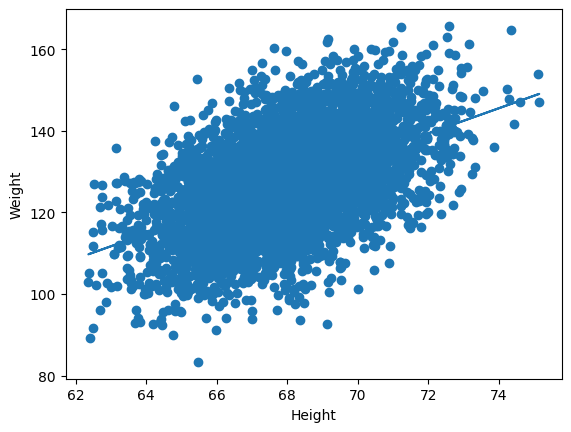

In [19]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linearmodel.predict(X_test_scaled))
plt.xlabel('Height')
plt.ylabel('Weight')

In [20]:
OLSmodel = sm.OLS(y_train,X_train).fit()
print(OLSmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.026e+06
Date:                Fri, 06 Jun 2025   Prob (F-statistic):                        0.00
Time:                        21:21:23   Log-Likelihood:                         -75090.
No. Observations:               20000   AIC:                                  1.502e+05
Df Residuals:                   19999   BIC:                                  1.502e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [21]:
with open('model.pkl','wb') as f:
    pickle.dump(linearmodel,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)